TransferFunctionContinuous(
array([0.0006]),
array([1.        , 0.33833333, 0.00166667]),
dt: None
)


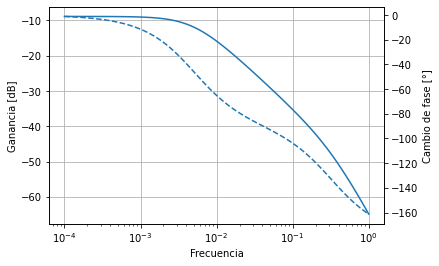

In [1]:
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np
from more_itertools import one
from utils.math import ratpoly_coeffs

def sys_from_expr(expr, var):
    numer, denom = (
        [*map(float, coeffs)] for coeffs in ratpoly_coeffs(expr, var))
    return signal.TransferFunction(numer, denom)

tau1, tau2 = 3, 200
kp = 1.8/(15*tau2)
sys = signal.TransferFunction([kp], [1, (1/tau1)+(1/tau2), 1/(tau1*tau2)])
w, mag, phase = signal.bode(sys)

print(sys)
fig, ax_mag = plt.subplots()
ax_phase = ax_mag.twinx()
ax_mag.set_xlabel("Frecuencia")
ax_mag.set_ylabel("Ganancia [dB]")
ax_phase.set_ylabel("Cambio de fase [°]")
ax_mag.grid()

ax_mag.semilogx(w, mag)
ax_phase.semilogx(w, phase, "--")

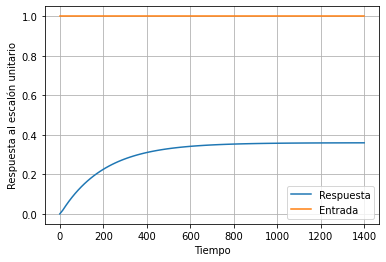

In [2]:
fig, ax_step = plt.subplots()
t, y = signal.step(sys)
ax_step.plot(t, y, label="Respuesta")
ax_step.plot(t, np.ones(one(t.shape)), label="Entrada")
ax_step.set_xlabel("Tiempo")
ax_step.set_ylabel("Respuesta al escalón unitario")
ax_step.legend()
ax_step.grid()
fig.savefig("parcial1/13.png", dpi=300)

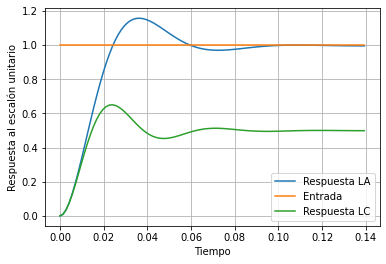

In [7]:
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np
from sympy.abc import s

# unidades en mksa
r_a = 0.5
l_a = 5*10**(-3)
k_t = 1
k_b = 1
j = 0.02
b = 0.01

# expresión obtenida en el desarrollo del ejercicio
tf = k_t/(k_t*k_b + r_a*b+(r_a*j + l_a*b)*s+j*l_a*s**2)

sys = sys_from_expr(tf, s)

fig, ax_step = plt.subplots()
ax_step.set_xlabel("Tiempo")
ax_step.set_ylabel("Respuesta al escalón unitario")

t, y = signal.step(sys)
ax_step.plot(t, y, label="Respuesta LA")
ax_step.plot(t, np.ones(one(t.shape)), label="Entrada")
ax_step.legend()
ax_step.grid()
#fig.savefig("parcial1/10_no_feedback.png", dpi=300)

tf_lc = together(tf/(1+tf))


sys_lc = sys_from_expr(tf_lc, s)

t_lc, y_lc = signal.step(sys_lc)

ax_step.plot(t_lc, y_lc, label="Respuesta LC")
ax_step.legend()
#fig.savefig("parcial1/10_both.png", dpi=300)